In [75]:
!pip install pystan~=2.14
!pip install fbprophet
!pip install pandas-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot
import pandas as pd
from sklearn.metrics import mean_absolute_error
from fbprophet import Prophet
import pandas_datareader as pdr

In [4]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 79.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.2 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
#stock = input("Enter the nasadq index: \n")
#df = pdr.get_data_yahoo(stock)
#df = pdr.get_data_yahoo('TSLA')

df=pd.read_csv("Tel3.csv")
df

,date,T2M,RH2M,WS2M,WD2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude
0,01-01-2015,25.87,55.19,1.60,191.44,0.60,0.27,3.55,98.53,0.01,0.23,-1.40015,0.96675,1.70148
1,02-01-2015,25.58,66.88,2.10,141.31,0.41,0.26,2.82,98.89,0.00,0.23,-1.74316,1.00767,2.01346
2,03-01-2015,25.63,71.69,2.37,199.56,0.48,0.32,11.61,99.02,0.00,0.23,-2.03657,1.02990,2.28217
3,04-01-2015,24.32,67.44,2.31,317.44,0.49,0.41,14.03,99.13,0.00,0.23,-2.26712,1.02739,2.48905
4,05-01-2015,23.01,57.19,3.02,80.62,0.64,0.38,8.85,99.11,0.00,0.23,-2.42346,0.99678,2.62044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,27-12-2021,21.87,82.69,1.44,151.44,0.36,0.57,23.55,99.27,0.00,-1.21,-0.70756,0.47105,0.85002
2553,28-12-2021,21.91,81.25,1.80,146.62,0.53,0.56,25.81,99.20,0.00,-1.21,-0.65159,0.47253,0.80489
2554,29-12-2021,22.00,79.50,1.93,139.62,0.52,0.55,27.69,99.17,0.00,-1.21,-0.55501,0.44320,0.71026
2555,30-12-2021,21.64,80.19,2.06,103.62,0.51,0.55,25.68,99.38,0.00,-1.21,-0.42160,0.38602,0.57163


In [78]:
df=df.reset_index()
df.rename(columns={'date': 'ds', 'T2M': 'y'}, inplace=True)

In [79]:
df

,index,ds,y,RH2M,WS2M,WD2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude
0,0,01-01-2015,25.87,55.19,1.60,191.44,0.60,0.27,3.55,98.53,0.01,0.23,-1.40015,0.96675,1.70148
1,1,02-01-2015,25.58,66.88,2.10,141.31,0.41,0.26,2.82,98.89,0.00,0.23,-1.74316,1.00767,2.01346
2,2,03-01-2015,25.63,71.69,2.37,199.56,0.48,0.32,11.61,99.02,0.00,0.23,-2.03657,1.02990,2.28217
3,3,04-01-2015,24.32,67.44,2.31,317.44,0.49,0.41,14.03,99.13,0.00,0.23,-2.26712,1.02739,2.48905
4,4,05-01-2015,23.01,57.19,3.02,80.62,0.64,0.38,8.85,99.11,0.00,0.23,-2.42346,0.99678,2.62044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2552,27-12-2021,21.87,82.69,1.44,151.44,0.36,0.57,23.55,99.27,0.00,-1.21,-0.70756,0.47105,0.85002
2553,2553,28-12-2021,21.91,81.25,1.80,146.62,0.53,0.56,25.81,99.20,0.00,-1.21,-0.65159,0.47253,0.80489
2554,2554,29-12-2021,22.00,79.50,1.93,139.62,0.52,0.55,27.69,99.17,0.00,-1.21,-0.55501,0.44320,0.71026
2555,2555,30-12-2021,21.64,80.19,2.06,103.62,0.51,0.55,25.68,99.38,0.00,-1.21,-0.42160,0.38602,0.57163


In [80]:
df.isna().sum()

index               0
ds                  0
y                   0
RH2M                0
WS2M                0
WD2M                0
ALLSKY_KT           0
GWETTOP             0
EVLAND              0
PS                  0
PRECIPITATIONCAL    0
MEI                 0
PC1                 0
PC2                 0
amplitude           0
dtype: int64

In [81]:
df.describe()

,index,y,RH2M,WS2M,WD2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude
count,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000
mean,1278.000000,27.500504,64.514005,2.113305,177.029218,0.533942,0.493778,25.169273,98.556265,2.862937,-0.071991,-0.006031,-0.000786,1.113203
std,738.286643,4.009433,18.113793,0.890180,75.450617,0.130803,0.240209,19.483556,0.451232,8.563379,0.963110,0.904152,0.872560,0.582394
min,0.000000,17.190000,14.880000,0.450000,12.120000,0.070000,0.110000,0.060000,97.390000,0.000000,-1.530000,-2.496940,-2.598810,0.011970
25%,639.000000,24.980000,49.120000,1.410000,125.310000,0.460000,0.270000,5.060000,98.170000,0.000000,-0.790000,-0.633300,-0.585890,0.673900
50%,1278.000000,27.080000,66.380000,1.950000,171.380000,0.570000,0.490000,25.070000,98.550000,0.000000,-0.240000,-0.024300,0.039390,1.039910
75%,1917.000000,29.930000,81.120000,2.710000,242.500000,0.630000,0.710000,40.500000,98.950000,0.860000,0.350000,0.635940,0.563920,1.491530
max,2556.000000,39.510000,94.810000,6.160000,352.120000,0.750000,0.980000,80.860000,99.550000,111.920000,2.210000,2.875470,2.840250,2.886400


In [82]:
df.describe

<bound method NDFrame.describe of       index          ds      y   RH2M  WS2M    WD2M  ALLSKY_KT  GWETTOP  \
0         0  01-01-2015  25.87  55.19  1.60  191.44       0.60     0.27   
1         1  02-01-2015  25.58  66.88  2.10  141.31       0.41     0.26   
2         2  03-01-2015  25.63  71.69  2.37  199.56       0.48     0.32   
3         3  04-01-2015  24.32  67.44  2.31  317.44       0.49     0.41   
4         4  05-01-2015  23.01  57.19  3.02   80.62       0.64     0.38   
...     ...         ...    ...    ...   ...     ...        ...      ...   
2552   2552  27-12-2021  21.87  82.69  1.44  151.44       0.36     0.57   
2553   2553  28-12-2021  21.91  81.25  1.80  146.62       0.53     0.56   
2554   2554  29-12-2021  22.00  79.50  1.93  139.62       0.52     0.55   
2555   2555  30-12-2021  21.64  80.19  2.06  103.62       0.51     0.55   
2556   2556  31-12-2021  21.68  76.75  1.34   84.25       0.62     0.55   

      EVLAND     PS  PRECIPITATIONCAL   MEI      PC1      PC2  am

In [83]:
df.shape

(2557, 15)

In [84]:
df=df.dropna()

In [85]:
import numpy as np
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
mean_imputer.fit_transform((df['y'].values).reshape(-1,1))

array([[25.87],
       [25.58],
       [25.63],
       ...,
       [22.  ],
       [21.64],
       [21.68]])

<AxesSubplot:xlabel='y'>

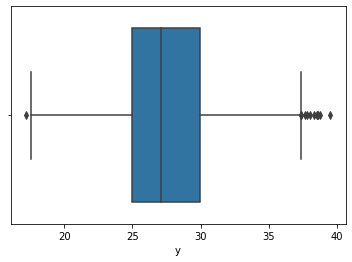

In [86]:
import seaborn as sns
sns.boxplot(x=df['y'])

In [62]:
# q1 = df.quantile(0.25)
# q3 = df.quantile(0.75)
# iqr = q3-q1
# print((df['y']<(q1-1.5*iqr)) | (df['y']>(q3+1.5*iqr)))

In [89]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [90]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [91]:
future_dates=model.make_future_dataframe(periods=30)

In [92]:
future_dates.tail()

,ds
2582,2022-01-26
2583,2022-01-27
2584,2022-01-28
2585,2022-01-29
2586,2022-01-30


In [93]:
prediction = model.predict(future_dates)

In [94]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2582,2022-01-26,26.545783,19.550698,27.564313,26.545664,26.546008,-2.914571,-2.914571,-2.914571,0.008539,0.008539,0.008539,-2.923110,-2.923110,-2.923110,0.0,0.0,0.0,23.631212
2583,2022-01-27,26.544494,19.875193,27.958578,26.544361,26.544798,-2.699642,-2.699642,-2.699642,0.099848,0.099848,0.099848,-2.799490,-2.799490,-2.799490,0.0,0.0,0.0,23.844852
2584,2022-01-28,26.543205,19.712951,27.870276,26.543058,26.543574,-2.684912,-2.684912,-2.684912,-0.022645,-0.022645,-0.022645,-2.662268,-2.662268,-2.662268,0.0,0.0,0.0,23.858293
2585,2022-01-29,26.541916,19.814660,28.425230,26.541760,26.542398,-2.451937,-2.451937,-2.451937,0.061727,0.061727,0.061727,-2.513663,-2.513663,-2.513663,0.0,0.0,0.0,24.089979
2586,2022-01-30,26.540627,20.138472,28.102341,26.540412,26.541262,-2.416936,-2.416936,-2.416936,-0.060752,-0.060752,-0.060752,-2.356185,-2.356185,-2.356185,0.0,0.0,0.0,24.123691


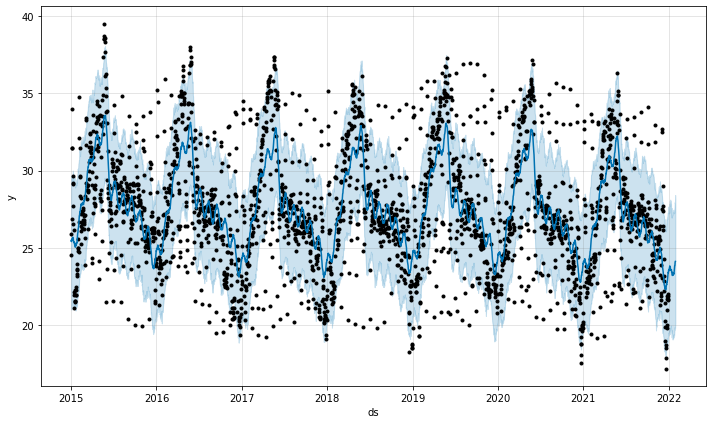

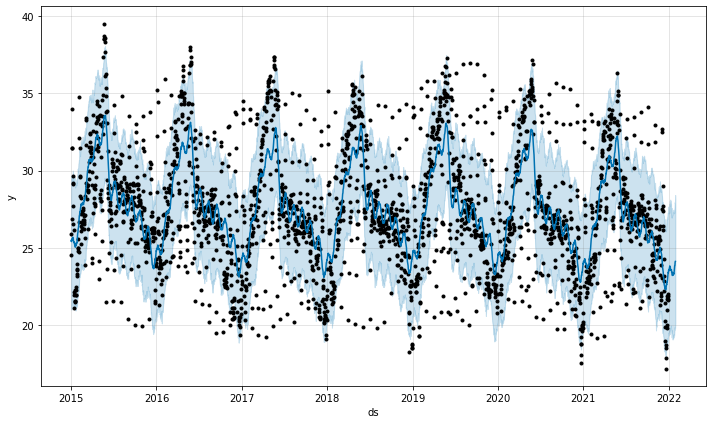

In [95]:
model.plot(prediction)

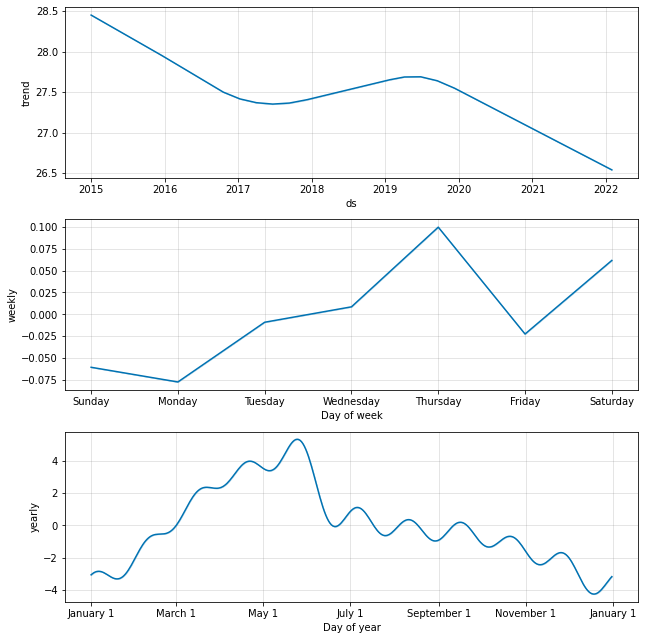

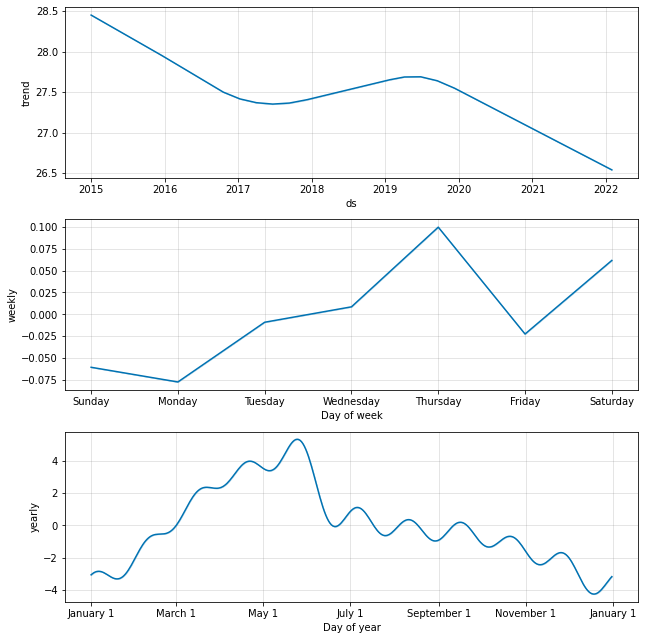

In [96]:
model.plot_components(prediction)

In [97]:
prediction.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2527,2021-12-02,26.616682,20.567159,28.713061,26.616682,26.616682,-2.025329,-2.025329,-2.025329,0.099848,0.099848,0.099848,-2.125177,-2.125177,-2.125177,0.0,0.0,0.0,24.591353
2528,2021-12-03,26.615393,20.190077,28.451837,26.615393,26.615393,-2.288630,-2.288630,-2.288630,-0.022645,-0.022645,-0.022645,-2.265985,-2.265985,-2.265985,0.0,0.0,0.0,24.326764
2529,2021-12-04,26.614104,20.278140,28.291419,26.614104,26.614104,-2.359258,-2.359258,-2.359258,0.061727,0.061727,0.061727,-2.420984,-2.420984,-2.420984,0.0,0.0,0.0,24.254847
2530,2021-12-05,26.612815,20.075096,27.974689,26.612815,26.612815,-2.647992,-2.647992,-2.647992,-0.060752,-0.060752,-0.060752,-2.587241,-2.587241,-2.587241,0.0,0.0,0.0,23.964823
2531,2021-12-06,26.611526,19.479795,27.836882,26.611526,26.611526,-2.839084,-2.839084,-2.839084,-0.077593,-0.077593,-0.077593,-2.761491,-2.761491,-2.761491,0.0,0.0,0.0,23.772443
2532,2021-12-07,26.610237,19.841871,27.953450,26.610237,26.610237,-2.949351,-2.949351,-2.949351,-0.009124,-0.009124,-0.009124,-2.940226,-2.940226,-2.940226,0.0,0.0,0.0,23.660886
2533,2021-12-08,26.608948,19.520490,27.794779,26.608948,26.608948,-3.111255,-3.111255,-3.111255,0.008539,0.008539,0.008539,-3.119794,-3.119794,-3.119794,0.0,0.0,0.0,23.497693
2534,2021-12-09,26.607659,19.282641,27.319816,26.607659,26.607659,-3.196643,-3.196643,-3.196643,0.099848,0.099848,0.099848,-3.296491,-3.296491,-3.296491,0.0,0.0,0.0,23.411016
2535,2021-12-10,26.606370,19.216034,27.165932,26.606370,26.606370,-3.489314,-3.489314,-3.489314,-0.022645,-0.022645,-0.022645,-3.466669,-3.466669,-3.466669,0.0,0.0,0.0,23.117056
2536,2021-12-11,26.605081,18.773399,27.119274,26.605081,26.605081,-3.565106,-3.565106,-3.565106,0.061727,0.061727,0.061727,-3.626833,-3.626833,-3.626833,0.0,0.0,0.0,23.039974


In [98]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
print(sqrt(mean_squared_error(df["y"].iloc[-31:], prediction["yhat"].loc[2526:2556])))
print(mean_absolute_error(df["y"].iloc[-31:],prediction["yhat"].loc[2526:2556])) 
print(mean_absolute_percentage_error(df["y"].iloc[-31:],prediction["yhat"].loc[2526:2556]))

2.3553688806943884
1.9350611030211213
0.09643738470144704
